# Lending Club Case Study - Fasal Shah/Mahadevaprasad C

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

# Path where loan.csv is located
data_path = 'loan.csv'

## Data Loading and Reviewing

In [2]:
# Load in the data in loan.csv using encoding UTF-8
loan_data = pd.read_csv(data_path, encoding='UTF-8', low_memory=False)
# Sample the data in the dataset 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_data.shape

(39717, 111)

## Data Cleaning

In [4]:
pd.set_option('display.max_columns', 111)
null_col = loan_data.isnull().sum()
null_col

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
# Several columns with all rows as null values. Delete such columns.
df_without_na_col = loan_data.dropna(how='all', axis=1)
df_without_na_col

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,

In [6]:
# There are still null values, Get the null counts per column.
null_col = df_without_na_col.isnull().sum()
null_col

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
# Remove mths_since_last_delinq, mths_since_last_record, next_pymnt_d since more than 50% of records are null
df_without_na_col = df_without_na_col.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'])

## Data Analysis
### Univariate

In [8]:
def count_plot(col):
    ax = df_without_na_col[col].value_counts().plot.bar(title='Freq dist of'+ col)
    ax.set(xlabel=col, ylabel='count')
    return ax

In [35]:
def create_ratio_plot(col):
    ax = (df_without_na_chargedOff[col].value_counts()[:]/df_without_na_col[col].value_counts()[:] * 100).plot(kind='bar')
    ax.set(xlabel=col, ylabel='loan status(default)')
    return ax

In [9]:
def display_values(ax,value_type):
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())

    total = sum(totals)
    
    if value_type=="percentage":
        for i in ax.patches:
            ax.text(i.get_x()+.12, i.get_height(),str(round((i.get_height()/total)*100, 2))+'%',fontsize=12,color='black')
        return
    elif value_type=="absolute":
        for i in ax.patches:
            ax.text(i.get_x()+.12, i.get_height(), str(round((i.get_height()), 2))+'%', fontsize=10, rotation=45,color='black')
        return
         
        

In [10]:
# Further we will analyse our data to see which coloumns are relevant 
# Taking categorical data
df_without_na_col[['application_type','term','grade',"initial_list_status","pymnt_plan","purpose","title"]].describe()

,application_type,term,grade,initial_list_status,pymnt_plan,purpose,title
count,39717,39717,39717,39717,39717,39717,39706
unique,1,2,7,1,1,14,19615
top,INDIVIDUAL,36 months,B,f,n,debt_consolidation,Debt Consolidation
freq,39717,29096,12020,39717,39717,18641,2184


In [11]:
#we can see application_type,initial_list_status,pymnt_plan has only one unique value which will not make any impact on our analysis so we can drop it
df_without_na_col = df_without_na_col.drop(columns=['application_type','initial_list_status','pymnt_plan'])

In [12]:
df_without_na_col.shape

(39717, 51)

[]

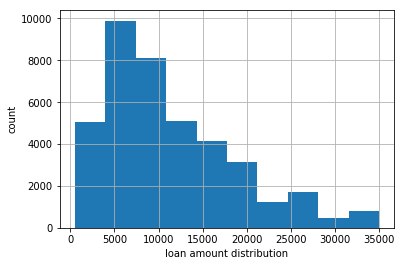

In [13]:
# Analyze the distribution of loan amount
ax = df_without_na_col['loan_amnt'].hist()
ax.set(xlabel='loan amount distribution', ylabel='count')
plt.plot()

Observation: max number of loan amount given between to 5-10k    
Loan amount is well distributed and can be used for various analysis

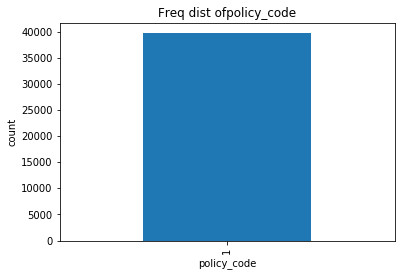

In [16]:
# Analyse the Unique Values in policy_code
count_plot('policy_code')

In [17]:
# From above bar chart we can see policy code has unique value hence we can drop it
df_without_na_col = df_without_na_col.drop(columns=['policy_code'])

In [18]:
df_without_na_col.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,0.0,0.0,0.0,2.000000,0.0


In [19]:
#we can observe [collections_12_mths_ex_med,acc_now_delinq, 
#chargeoff_within_12_mths,delinq_amnt,tax_liens] are zero hence we can drop them also
df_without_na_col = df_without_na_col.drop(columns=['collections_12_mths_ex_med','acc_now_delinq',
                                'chargeoff_within_12_mths','tax_liens','delinq_amnt'])

In [20]:
df_without_na_col.shape

(39717, 45)

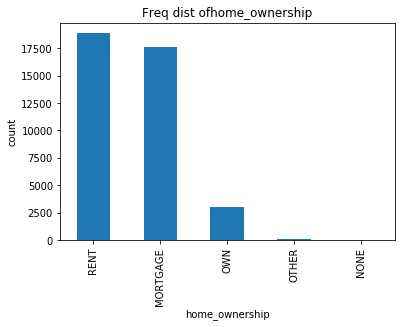

In [21]:
count_plot('home_ownership')

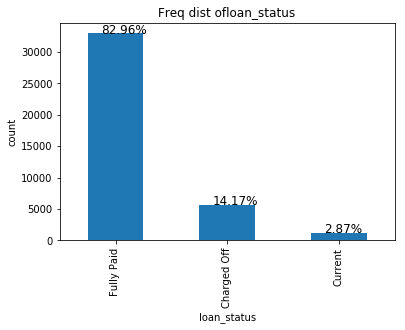

In [22]:
ax = count_plot('loan_status')
display_values(ax,"percentage")

Observation: Above data indicates that there are 14% defaulters

[]

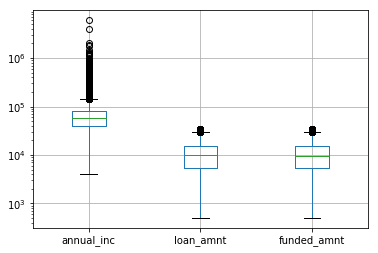

In [23]:
# Look for outliers in annual_inc and loan_amnt columns
ax = df_without_na_col.boxplot(column=['annual_inc', 'loan_amnt', 'funded_amnt'])
ax.set_yscale('log')
plt.plot()

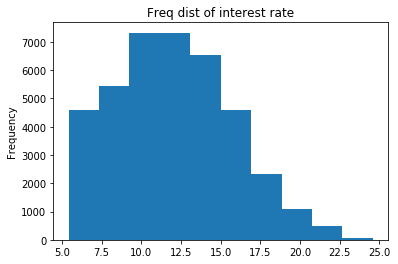

In [24]:
# We can observe several outliers in annual income. Median lies between 50000 to 100000.
# Not treating them as the outlier count is high.

# Analyze interest rate, converting the column type to floating data type first.
df_without_na_col['int_rate'] = df_without_na_col['int_rate'].str.rstrip("%").astype(float)
df_without_na_col['int_rate'].describe()
pd.to_numeric(df_without_na_col['int_rate'])
df_without_na_col['int_rate'].plot.hist(title='Freq dist of interest rate')

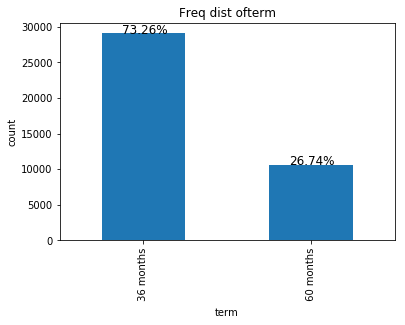

In [25]:
ax = count_plot('term')
display_values(ax,"percentage")

Observation: 75%  of loans are given to 36months 

### Bivariate

In [26]:
# Investigate the impact of different variables on loan_status
# Start with removing the loan status 'Current' as it is still in progress and does not give much insight. 
is_notCurrent =  df_without_na_col['loan_status']!='Current'
df_without_na_col = df_without_na_col[is_notCurrent]
df_without_na_col.shape
df_without_na_col.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,38577.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.0,0.0,11866.970365,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.043479
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.0,0.0,8809.856227,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.204583
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.0,0.0,5513.497338,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.0,0.0,9674.048405,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.0,0.0,16136.952430,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


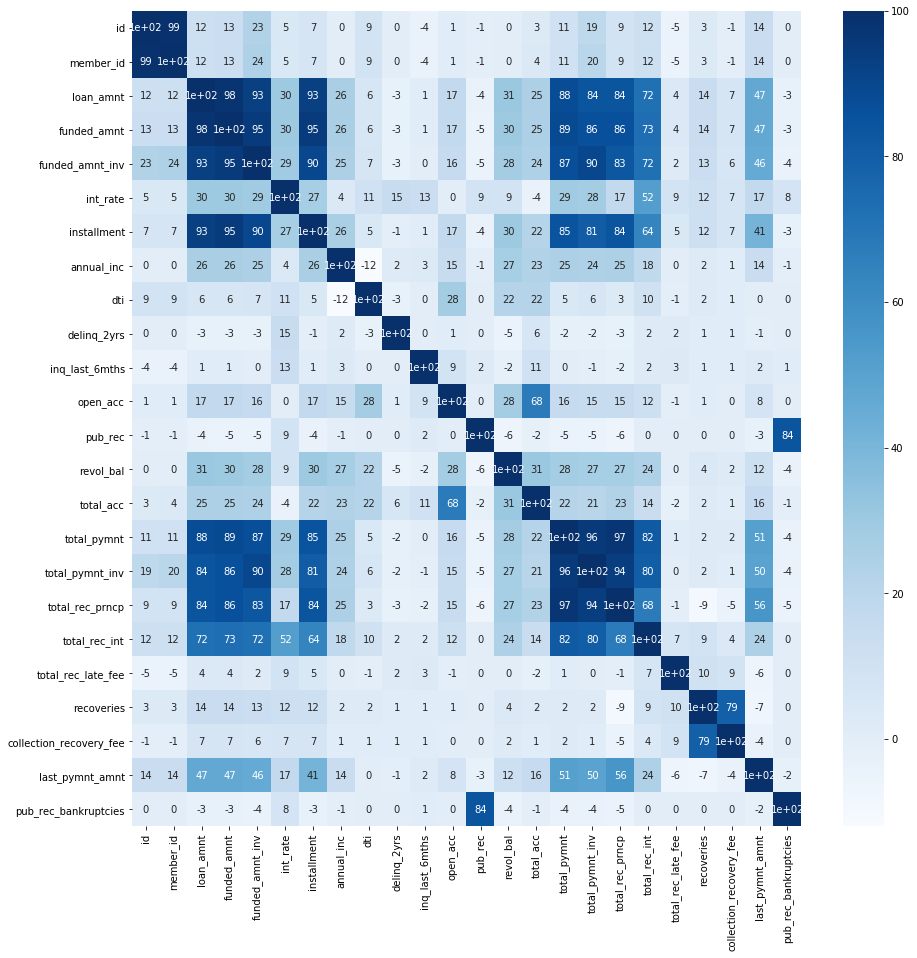

In [28]:
# delete columns out_prncp, out_prncp_inv. They just have 0 values.
df_without_na_col = df_without_na_col.drop(columns=['out_prncp','out_prncp_inv'])

# Plot correlation of all numerical columns and observe the correlation.
loan_correlation = df_without_na_col.corr().mul(100).astype(int)

f, ax = plt.subplots(figsize=(15, 15))
#sns.set(font_scale=1.4)
#sns.heatmap(loan_correlation, 
#            xticklabels=loan_correlation.columns.values,
#            yticklabels=loan_correlation.columns.values,annot= True)
#plt.show()

cmap = sns.diverging_palette(h_neg=100, h_pos=100, s=90, l=50, as_cmap=True)

sns.heatmap(data=loan_correlation, annot=True, cmap = "Blues",annot_kws={"size": 10},)


Observation: We can observe valid correlation values among remaining variables for example loan_amount, funded_amount and funded_amnt_inv has good relation we can use any one of them...     Dataset is good for further analysis.

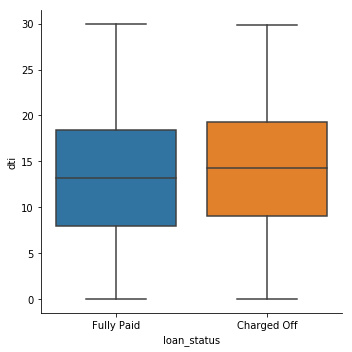

In [29]:
# Check the impact of dti on loan_status
sns.catplot(x="loan_status", y="dti", data=df_without_na_col, kind='box');

Distribution of dti is slightly higher in case of 'Charged Off', expected as borrower might have paid more interest due to successive non-payment.


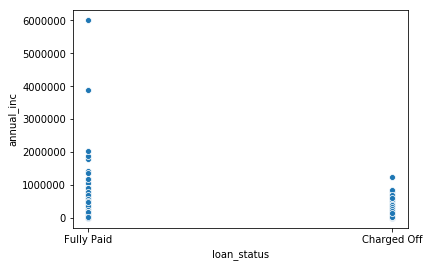

In [31]:
# Check the impact annual_inc, int_rate on loan_status
sns.scatterplot(x="loan_status", y="annual_inc", data=df_without_na_col);

Majority of the defaulters are in the lower income bracket.

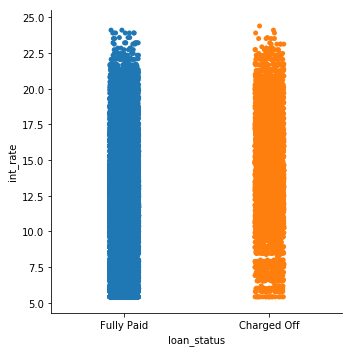

In [32]:
# Check the impact int_rate on loan_status
sns.catplot(x="loan_status", y="int_rate", data=df_without_na_col);

Interest rate. General observation is that the density is higher as the rate goes up towards 10% and higher.
Will be ineteresting to look at it in relation to other variables.

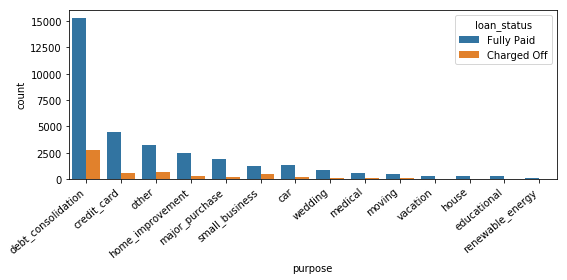

In [34]:
# Observe the imapct of purpose over loan_status.
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df_without_na_col, x= 'purpose', order=df_without_na_col['purpose'].value_counts().index,hue = 'loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

 Highest number of the loans are issued for the purpose of debt consolidation.    
 Majority of the borrowers are intending for debt consolidation and defauters too are higher.


In [36]:
#charged off column
is_chargedOff =  df_without_na_col['loan_status']=='Charged Off'
df_without_na_chargedOff = df_without_na_col[is_chargedOff]

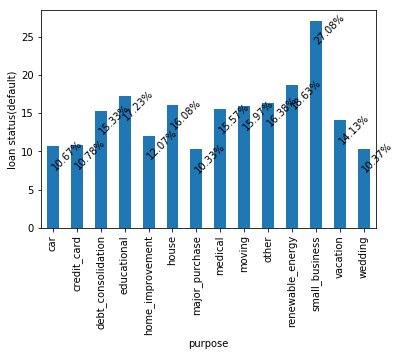

In [38]:
# Observe the impact of purpose over loan_status in terms of ration.
ax = create_ratio_plot('purpose')
ax = display_values(ax,"absolute")

Small businesses have higer ratio of defaulters (27%) followed with renewable_energy and educational. 
Debt consolidation being the highest volume of loan applications has a defaulter percentage of 15%.
Need to analyze this further in terms of overall loss.

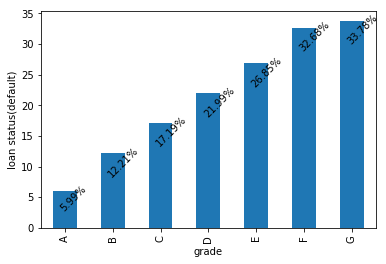

In [40]:
# Observe the impact of grades over loan_status in terms of ratio.
ax = create_ratio_plot('grade')
display_values(ax,"absolute")

Observation lower grades F G have higher defaulters (30%)

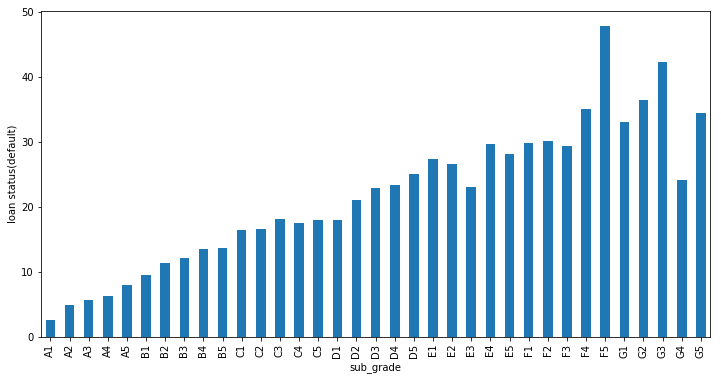

In [42]:
# Observe the impact of sub grades over loan_status in terms of ration.
plt.figure(figsize=(12,6))
ax = create_ratio_plot('sub_grade')


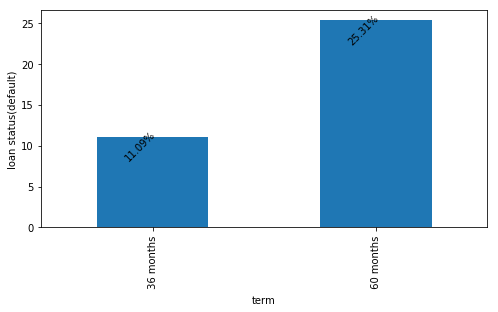

In [44]:
# Impact of terms
plt.figure(figsize=(8,4))
ax = create_ratio_plot("term")
display_values(ax,"absolute")

Even though 75% of loans were given to 36 months but defaulter rate has increased alot in 60 months 

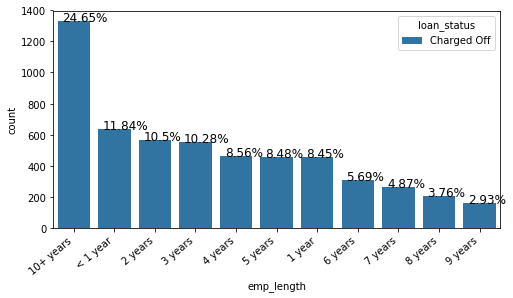

In [45]:
# defaul w.r.t to employee length but not much info here
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df_without_na_chargedOff, x= 'emp_length', order=df_without_na_chargedOff['emp_length'].value_counts().index,hue = 'loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
display_values(ax,"percentage")

24% of the of defaulters having an employment length of more than 10 years.

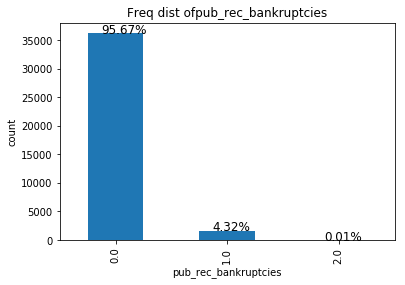

In [46]:
#analysing using heat map we see good correlation b/w pub_rec and pub_rec_bankruptcies so we can use any one of them
ax = count_plot('pub_rec_bankruptcies')
display_values(ax,"percentage")

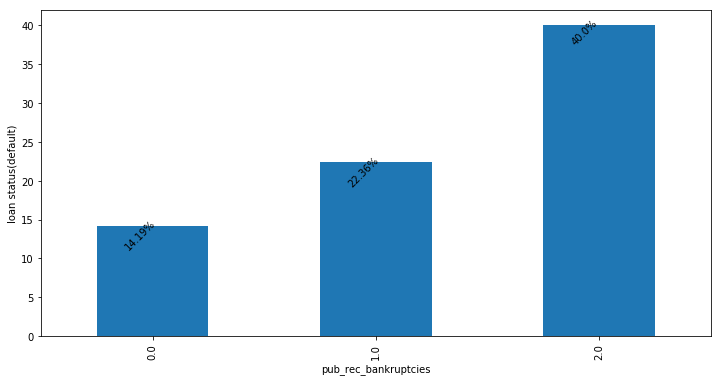

In [47]:
plt.figure(figsize=(12,6))
ax = create_ratio_plot('pub_rec_bankruptcies')
display_values(ax,"absolute")

Observation: Rate of defaulters increases as number of public record bankruptcies increases 

C:\Users\fss5kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\fss5kor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[]

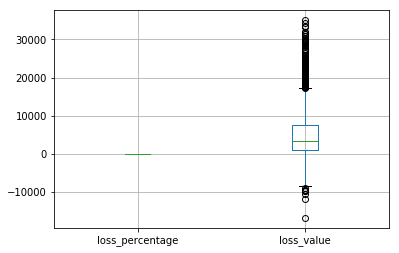

In [48]:
# Derive the Total Loss % and loss amount for each of the defaulted loans.
df_without_na_chargedOff['loss_percentage'] = (1 - df_without_na_chargedOff['total_pymnt']/df_without_na_chargedOff['funded_amnt']) * 100
df_without_na_chargedOff['loss_value'] = df_without_na_chargedOff['funded_amnt'] - df_without_na_chargedOff['total_pymnt']

# Look for outliers in derived parameter loss_percentage
ax = df_without_na_chargedOff.boxplot(column=['loss_percentage', 'loss_value'])
plt.plot()

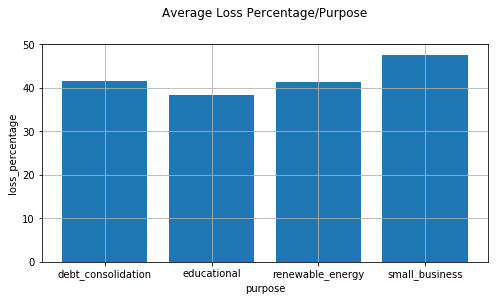

In [49]:
# Consolidate defaulters with identified top purposes
is_topPurposeConsolidation =  df_without_na_chargedOff['purpose'].isin(['small_business','renewable_energy','educational','debt_consolidation'])
df_without_na_purposeConsolidation = df_without_na_chargedOff[is_topPurposeConsolidation]

# Observe the loss contribution of top purposes.
average_loss_data = df_without_na_purposeConsolidation.groupby('purpose').mean()

plt.figure(figsize=(8,4))
plt.bar(average_loss_data.index, average_loss_data['loss_percentage'])
plt.xlabel('purpose')
plt.ylabel('loss_percentage')
plt.title('Average Loss Percentage/Purpose', y=1.1)
plt.grid()
plt.show()


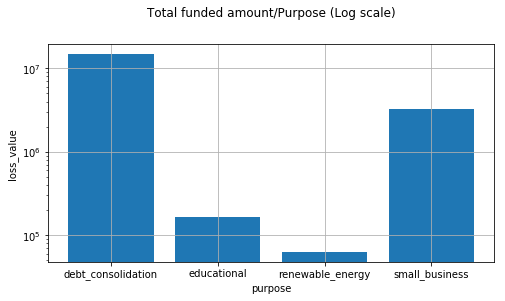

In [50]:
loss_by_purpose_data = df_without_na_purposeConsolidation.groupby('purpose').sum()

plt.figure(figsize=(8,4))
plt.bar(average_loss_data.index, loss_by_purpose_data['loss_value'])
plt.xlabel('purpose')
plt.ylabel('loss_value')
plt.yscale('log')
plt.title('Total funded amount/Purpose (Log scale)', y=1.1)
plt.grid()
plt.show()

## Multivariate

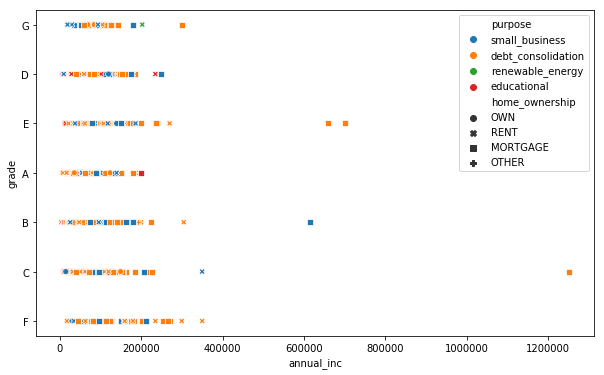

In [51]:
# Analyze top identified purposes further with respect to other parameteres like annual_income, int_rate etc.

# Analyze annual_income with respect to purpose and home_ownership
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="annual_inc", y="grade", data=df_without_na_purposeConsolidation, hue='purpose',
                     style='home_ownership')

We can observe from above plot that most of the defaulters are having an annual income under 200K.    
Among the higher income borrowers individuals with 'Mortage' type of home_ownership are the ones defaulting.

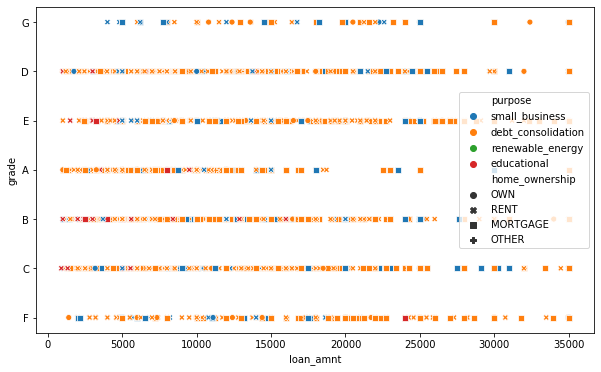

In [49]:
# Analyze loan_amount with respect to purpose and home_ownership
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="loan_amnt", y="grade", data=df_without_na_purposeConsolidation, hue='purpose', style='home_ownership')

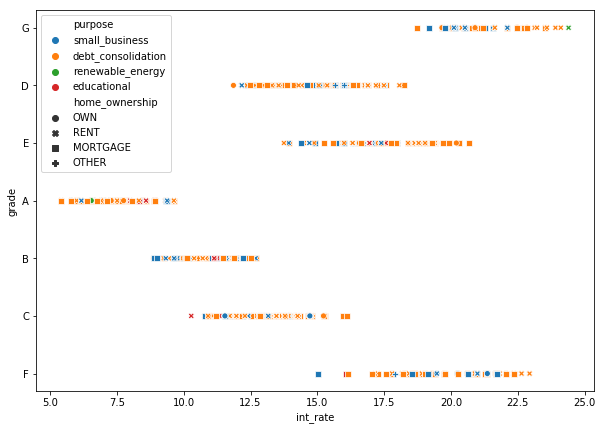

In [58]:
# Loan amout does not seem to play major role in defaulter behaviour. We can ignore this parameter.


# Analyze int_rate with respect to purpose and home_ownership
plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="int_rate", y="grade", data=df_without_na_purposeConsolidation, hue='purpose', style='home_ownership')

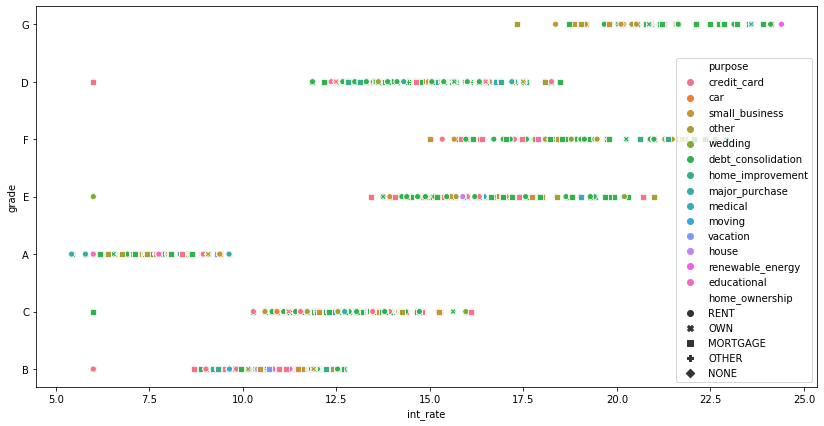

In [51]:
# Analyze int_rate with respect to purpose and home_ownership on overall data
plt.figure(figsize=(14, 7))
ax = sns.scatterplot(x="int_rate", y="grade", data=df_without_na_col, hue='purpose', style='home_ownership')

In [54]:
# Interest rate plays a role in terms of number of defaulters per job grade. 
# In job_grade plot we can observe that job grades D, E, F and G are at the top end of defaulters percentage. 
# It is evident from the above scattered plot that the int_rate for the top defaulter job grades is upwards 12% approximately.

**_Few Key considerations from above analysis: _**<br>
1. Loan applications logged with purposes as 'debt_consolidation' and 'small_business' <br>
2. Annual income criteria (w.r.t purpose and home_ownership): <br>
    - Income under 200K are risky irrespective of type of home_ownership
    - Income over 200K but under 400K are risky under home ownership types ('RENT' or 'MORTGAGE')
    - Income over 400K are only risky if the home ownership type is ('MORTGAGE')

Some  points about defaulter from above analysis
 - Above data indicates that there are 14% defaulters
 - Majority of the defaulters are in the lower income bracket.
 - Small businesses have higer ratio of defaulters (27%) followed with renewable_energy and educational.
 - Even though 75% of loans were given to 36 months but defaulter rate has increased alot in 6o months term
 - 24% of the of defaulters having an employment length of more than 10 years.
 - lower grades F G have higher defaulters (30%)
 - public record of  bankruptcies indicates default rate increases with increase in number of bankruptcies  